## Question 1

In [126]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called users
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users=pd.read_csv(url, sep="|")

# Step 4. Discover what is the mean age per occupation
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [133]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

totalUserCount=users.groupby("occupation").gender.count()
totalMaleCount=users.query("gender == 'M'").groupby(["occupation","gender"]).gender.count()
ratio=(totalMaleCount/totalUserCount)*100
ratio.sort_values(ascending=False)


occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64

In [48]:
# Step 6. For each occupation, calculate the minimum and maximum ages

users[["occupation", "age"]].groupby("occupation").agg(["min", "max"])

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [51]:
# Step 7. For each combination of occupation and sex, calculate the mean age

pd.pivot_table(users, index=["occupation","gender"], aggfunc={"age": "mean"})

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [150]:
# Step 8. For each occupation present the percentage of women and men

totalUsers=users.groupby('occupation').gender.agg(['count'])
males=users.query("gender=='M'").groupby(['occupation','gender']).gender.agg(['count'])
females=users.query("gender=='F'").groupby(['occupation','gender']).gender.agg(['count'])
maleRatio=(males/totalUsers)*100
femaleRatio=(females/totalUsers)*100
pd.merge(maleRatio,femaleRatio,on='occupation')

,count_x,count_y
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


## Question 2

In [153]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12
euro12=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

# Step 4. Select only the Goal column
euro12["Goals"]


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [156]:
# Step 5. How many team participated in the Euro2012?
euro12[["Team"]].nunique()

Team    16
dtype: int64

In [159]:
# Step 6. What is the number of columns in the dataset?
print(f"Columns = {len(euro12.columns)}")

Columns = 35


In [95]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [96]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(["Red Cards", "Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [98]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline[["Team", "Yellow Cards"]].groupby("Team").mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [102]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [104]:
# Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [107]:
# Step 12. Select the first 7 columns
euro12.iloc[:,: 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [160]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [114]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[["Team", "Shooting Accuracy"]].query("Team in ('England', 'Italy', 'Russia')")

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [175]:
# Step 1.Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

first = pd.Series(np.random.randint(1,5,size=(100)))
second = pd.Series(np.random.randint(1,4,size=(100)))
third = pd.Series(np.random.randint(10000,30000,size=(100)))

In [178]:
# Step 3. Create a DataFrame by joinning the Series by column
housesData=pd.concat([first,second, third],axis=1)
housesData

,0,1,2
0,2,1,11487
1,3,3,25181
2,2,2,18588
3,4,3,13915
4,2,3,15878
...,...,...,...
95,1,3,12569
96,4,2,19944
97,1,2,25243
98,2,1,26675


In [182]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
housesData.columns = ["bedrs","bathrs","price_sqr_meter"]
housesData

,bedrs,bathrs,price_sqr_meter
0,2,1,11487
1,3,3,25181
2,2,2,18588
3,4,3,13915
4,2,3,15878
...,...,...,...
95,1,3,12569
96,4,2,19944
97,1,2,25243
98,2,1,26675


In [189]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat ([first,second,third],axis=0)
# Step 6. Ops it seems it is going only until index 99. Is it true?
# Yes
bigcolumn

0         2
1         3
2         2
3         4
4         2
      ...  
95    12569
96    19944
97    25243
98    26675
99    24455
Length: 300, dtype: int64

In [190]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn



0          2
1          3
2          2
3          4
4          2
       ...  
295    12569
296    19944
297    25243
298    26675
299    24455
Length: 300, dtype: int64

## Question 4

In [199]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv("wind.txt",sep='\s+')
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [202]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2061,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [203]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [205]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().values.sum()

31

In [208]:
# Step 7. Compute how many non-missing values there are in total.
newData.count().sum()

78857

In [210]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
# A single number for the entire dataset.
newData.mean().mean()

10.227982360836938

In [326]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
# A different set of numbers for each location.
minimumWindSpead=newData.min()
maximumWindSpead=newData.max()
meanWindSpead=newData.mean()
stdWindSpead=newData.std()
rowNames=["min","max","mean","std"]
loc_stats= pd.DataFrame([minimumWindSpead, maximumWindSpead, meanWindSpead, stdWindSpead],rowNames)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [325]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
# A different set of numbers for each day.
dayMinimumWindSpead=newData.min(axis=1)
dayMaximumWindSpead=newData.max(axis=1)
dayMeanWindSpead=newData.mean(axis=1)
dayStdWindSpead=newData.std(axis=1)
day_stats= pd.DataFrame([dayMinimumWindSpead, dayMaximumWindSpead, dayMeanWindSpead, dayStdWindSpead],rowNames)
day_stats

Date,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483


In [329]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.
print(newData[newData.index.month == 1].mean())

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [330]:
# Step 12. Downsample the record to a yearly frequency for each location.
newData.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [332]:
# Step 13. Downsample the record to a monthly frequency for each location.
newData.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [333]:
# Step 14. Downsample the record to a weekly frequency for each location.
newData.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [345]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
newData.resample('W').mean().head(52).apply(lambda x: x.describe())


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,12.316163,10.436978,11.296667,6.998690,10.930691,7.810330,9.764986,8.908732,8.732106,9.914712,13.658352,13.723933
std,3.419077,2.900003,2.789210,2.091987,2.674869,2.426344,2.850023,2.447832,2.412421,2.595592,3.640914,3.583555
min,4.202857,4.255714,6.738571,3.300000,6.112857,2.715714,3.964286,4.257143,4.501429,6.031429,5.875714,5.737143
25%,10.206786,8.431071,9.025000,5.432857,9.058333,6.213214,7.616071,6.914286,6.821429,7.688571,10.875714,11.287143
50%,11.643571,9.766429,10.860714,6.549286,10.357143,7.565000,9.425714,9.019286,8.740714,9.567143,13.570000,13.678571
75%,15.152857,13.054643,13.089643,8.379643,13.305714,9.285000,11.873512,10.294643,10.409286,11.846071,16.219286,16.047143
max,19.880000,16.417143,18.225714,12.720000,17.432857,14.828571,15.565714,15.160000,14.480000,16.461429,21.832857,23.641429


## Question 5

In [254]:
# Step 1. Import the necessary libraries
import numpy as np 
import pandas as pd

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [248]:
# Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [219]:
# Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [220]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [221]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [232]:
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered?
mostOrdered=chipo[["item_name", "quantity"]].groupby('item_name').sum().sort_values(by=['quantity'], ascending = False)
mostOrdered.iloc[0]

quantity    761
Name: Chicken Bowl, dtype: int64

In [236]:
# Step 11. What was the most ordered item in the choice_description column? 
choiceMostOrdered=chipo[["choice_description", "quantity"]].groupby('choice_description').sum().sort_values(by=['quantity'], ascending = False)
choiceMostOrdered.iloc[0]

quantity    159
Name: [Diet Coke], dtype: int64

In [238]:
# Step 12. How many items were orderd in total?
chipo.groupby('quantity').quantity.sum().sum()

4972

In [255]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
print(chipo.item_price.dtype)
changeToFloat = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(changeToFloat)
print(chipo.item_price.dtype)

object
float64


In [256]:
# Step 14. How much was the revenue for the period in the dataset? 
(chipo['quantity'] * chipo['item_price']).sum()

39237.02

In [277]:
# Step 15. How many orders were made in the period?
len(chipo.groupby("order_id").count())

1834

In [268]:
# Step 16. What is the average revenue amount per order?
chipo[["order_id", "item_price"]].groupby(by=['order_id']).mean().mean()

item_price    7.841911
dtype: float64

In [274]:
# Step 17. How many different items are sold?
len(chipo.groupby("item_name").count())

50

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

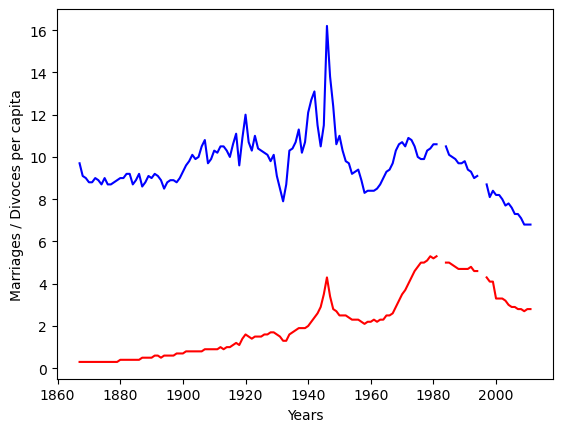

In [282]:
import matplotlib.pyplot as mathPlt
import pandas as pd

marriageDivorces=pd.read_csv('us-marriages-divorces-1867-2014.csv')
marraigesPerCapita=marriageDivorces.Marriages_per_1000.values
divorcesPerCapita=marriageDivorces.Divorces_per_1000.values
mathPlt.plot(marriageDivorces.Year.values,marraigesPerCapita,color="Blue")
mathPlt.plot(marriageDivorces.Year.values,divorcesPerCapita,color="Red")
mathPlt.xlabel("Years")
mathPlt.ylabel("Marriages / Divoces per capita")
mathPlt.show()

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

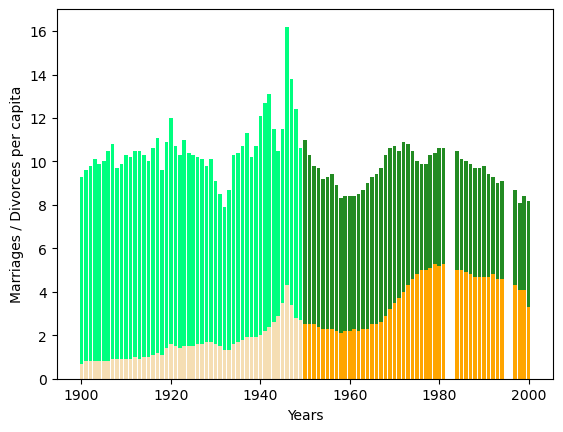

In [324]:
marriageDivorces1900_1950=marriageDivorces[(marriageDivorces.Year >= 1900) & (marriageDivorces.Year <= 1950)]
marriageDivorces1950_2000=marriageDivorces[(marriageDivorces.Year >= 1950) & (marriageDivorces.Year <= 2000)]
mathPlt.bar(marriageDivorces1900_1950['Year'],marriageDivorces1900_1950['Marriages_per_1000'],color="springgreen")
mathPlt.bar(marriageDivorces1900_1950['Year'],marriageDivorces1900_1950['Divorces_per_1000'],color="wheat")
mathPlt.bar(marriageDivorces1950_2000['Year'],marriageDivorces1950_2000['Marriages_per_1000'],color="forestgreen")
mathPlt.bar(marriageDivorces1950_2000['Year'],marriageDivorces1950_2000['Divorces_per_1000'],color="orange")
mathPlt.xlabel("Years")
mathPlt.ylabel("Marriages / Divorces per capita")
mathPlt.show()

 ## Question 8
 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
 the actors by their kill count and label each bar with the corresponding actor's name.
 Don't forget to label your axes!

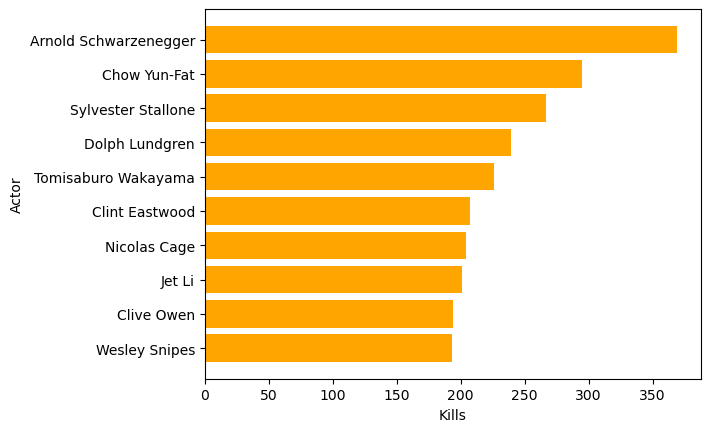

In [284]:
deadliestActors= pd.read_csv('actor_kill_counts.csv')
deadliestActors=deadliestActors.sort_values(by='Count',ascending=True)
mathPlt.barh(deadliestActors['Actor'],deadliestActors['Count'],color="orange")
mathPlt.xlabel("Kills")
mathPlt.ylabel("Actor")
mathPlt.show()

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

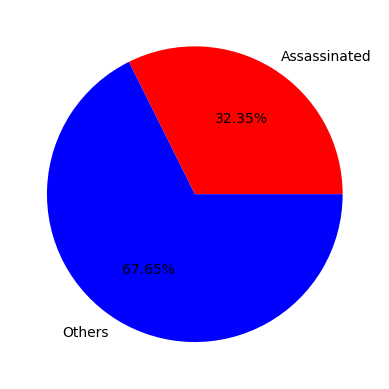

In [293]:
romanReigns = pd.read_csv('roman-emperor-reigns.csv')
assasinated= romanReigns.query("Cause_of_Death=='Assassinated'").Cause_of_Death.count()
mathPlt.pie([assasinated, romanReigns.Cause_of_Death.count() - assasinated],labels=["Assassinated", "Others"],colors=["red", "blue"],autopct='%.2f%%')
mathPlt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

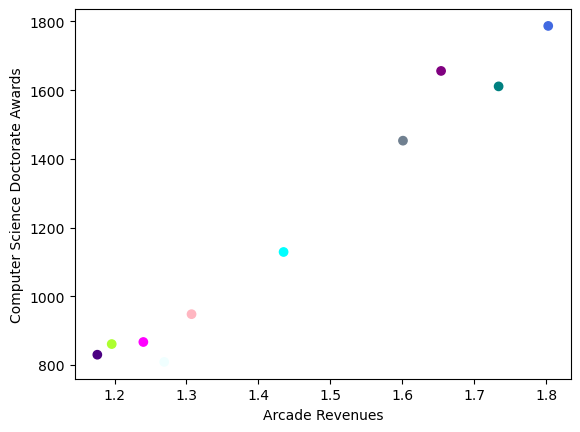

In [322]:
import random
arcadeRevenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colors= random.sample(["indigo","azure","purple","lightpink","slategrey","greenyellow","royalblue","aqua","magenta","teal"], k=10)
mathPlt.scatter(arcadeRevenue['Total Arcade Revenue (billions)'], arcadeRevenue['Computer Science Doctorates Awarded (US)'],
                color=colors)
mathPlt.xlabel("Arcade Revenues")
mathPlt.ylabel("Computer Science Doctorate Awards")
mathPlt.show()